## O-Ring Assignment

<ul>
<li>Read https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster</li>
<li>Go to https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring</li>
<li>Look at the main page and the Data Folder and Data Set Description page (links near top)</li>
<li>The o-ring-erosion-or-blowby.data file is attached to the assignment as o-ring-erosion-or-blowby.csv
“Blowby” means “leaking”</li>
<li>Load the file into a pandas DataFrame</li>
<li>Use statsmodels to do a multiple linear regression</li>
<li>How many O-rings does the model predict will show erosion or blowby when the temperature is 31 degrees F?  (We don’t know how much pressure the rings will experience at liftoff so do predictions at 0, 50, 100 and 200 PSI to see what difference it makes.)</li>
</ul>

In [8]:
# load libraries
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
# load data and assign column
df = pd.read_csv('o-ring-erosion-or-blowby.csv', names = ["rings", "distress", "temperature", "pressure", "order"])

In [3]:
# check data if looks correct
df

,rings,distress,temperature,pressure,order
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


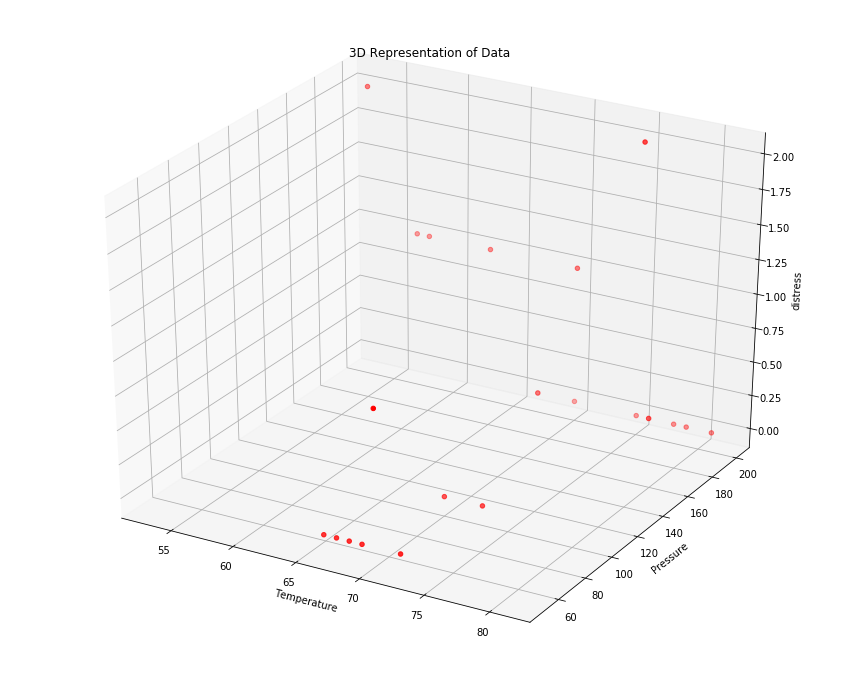

In [4]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')
                     
ax.scatter(df["temperature"], df["pressure"], df["distress"], color='red')

ax.set_title('3D Representation of Data')
ax.set_xlabel('Temperature')
ax.set_ylabel('Pressure')
ax.set_zlabel('distress')

plt.show()

In [5]:
# select temperature and pressure for predictor
X = df[["temperature", "pressure"]]

# select distress to predict
y = df["distress"]

# add constact for an intercept
X = sm.add_constant(X)

# call fit() from ols model
result = sm.OLS(y, X).fit()

# call summary to check result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distress   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.490
Date:                Wed, 06 Dec 2017   Prob (F-statistic):             0.0126
Time:                        15:16:37   Log-Likelihood:                -17.408
No. Observations:                  23   AIC:                             40.82
Df Residuals:                      20   BIC:                             44.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.3298      1.188      2.803      0.011       0.851       5.808
temperature    -0.0487      0.017     -2.910      0.009      -0.084      -0.014
pressure        0.0029      0.002      1.699      0.105      -0.001       0.007
==============================================================================
Omnibus:                       19.324   Durbin-Watson:                   2.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.471
Skew:                           1.782   Prob(JB):                     8.00e-06
Kurtosis:                       6.433   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# get above result into variables...
constant = result.params[0]
temperatureCoefficient = result.params[1] 
pressureCoefficient = result.params[2]

# set pressure prediction data
predictions = [0, 50, 100, 200]

# calculate and print the predictions through formula  y = b0 + b1X 
print("At temperature 31 with")
for pressure in predictions:
    print ("\tpressure", pressure, "and O-Rings in distress", 31 * temperatureCoefficient + pressureCoefficient * pressure + constant)

At temperature 31 with
	pressure 0 and O-Rings in distress 1.82102695086
	pressure 50 and O-Rings in distress 1.96799318368
	pressure 100 and O-Rings in distress 2.1149594165
	pressure 200 and O-Rings in distress 2.40889188214


In [7]:
# It's look like at least two o-rings will get distress, if the temperature is 31F.